<a href="https://colab.research.google.com/github/z1gyy/Data-Analysis/blob/main/project_credits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/z1gyy/Data-Analysis/main/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


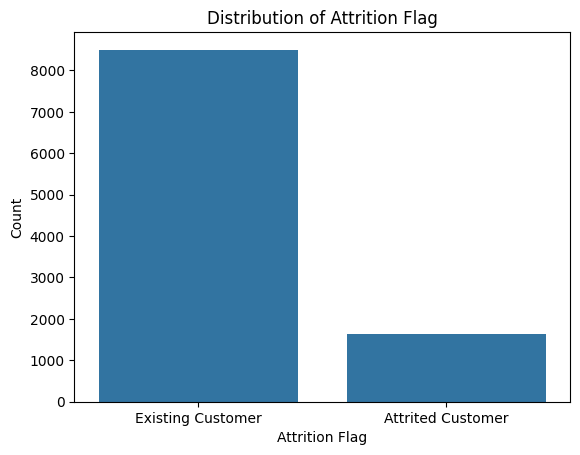

In [3]:
# Plotting the distribution of the target variable
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

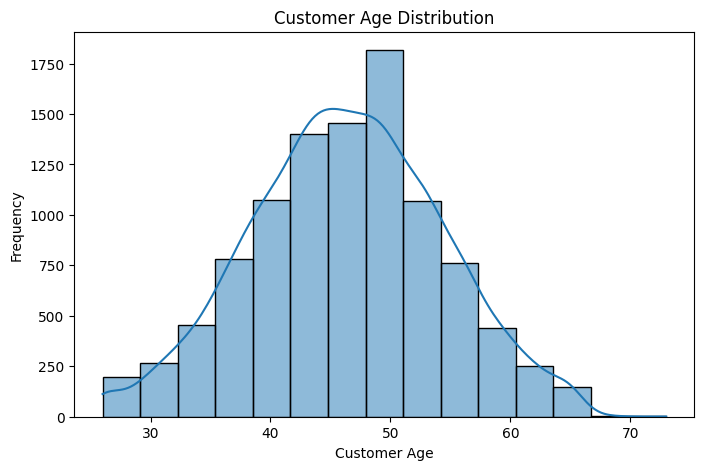

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer_Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

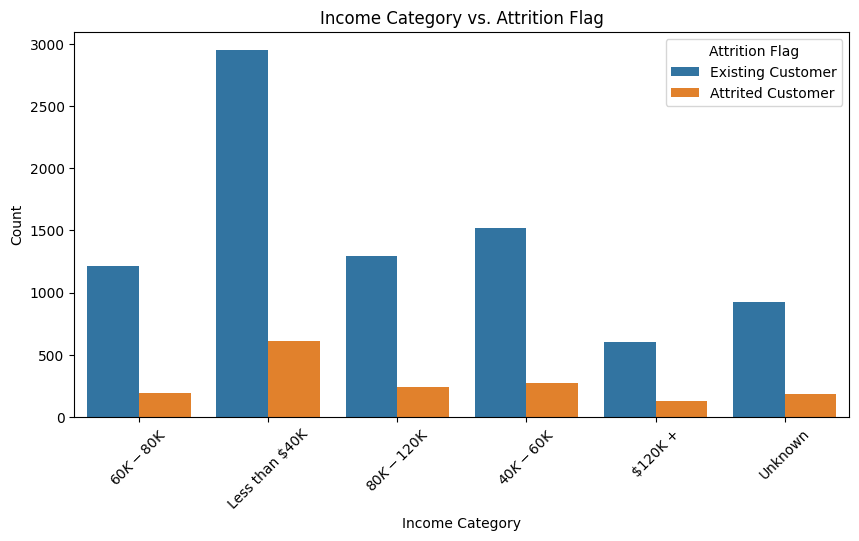

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag')
plt.title('Income Category vs. Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')
plt.show()

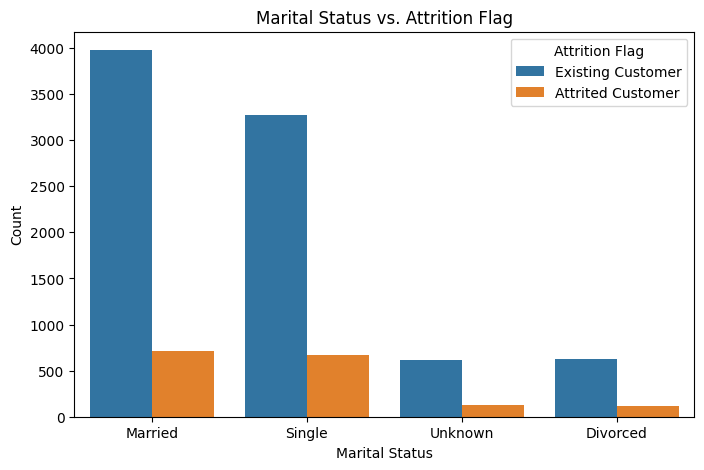

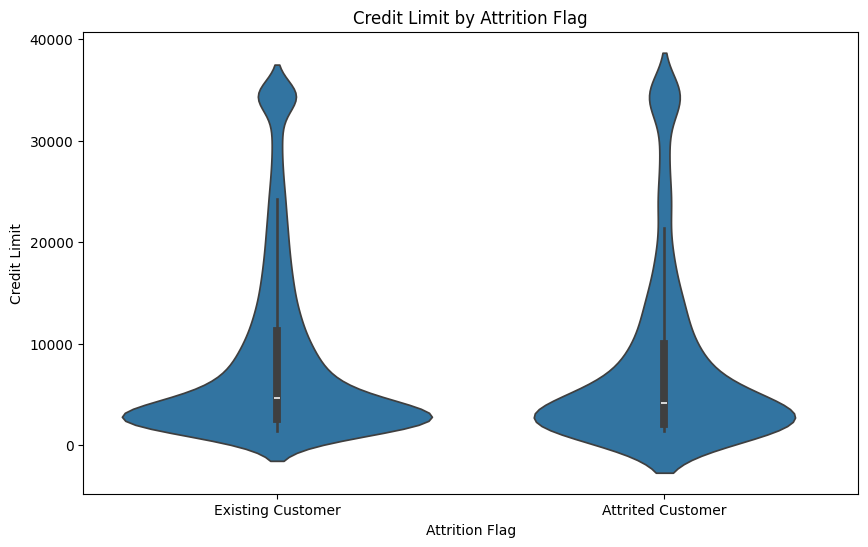

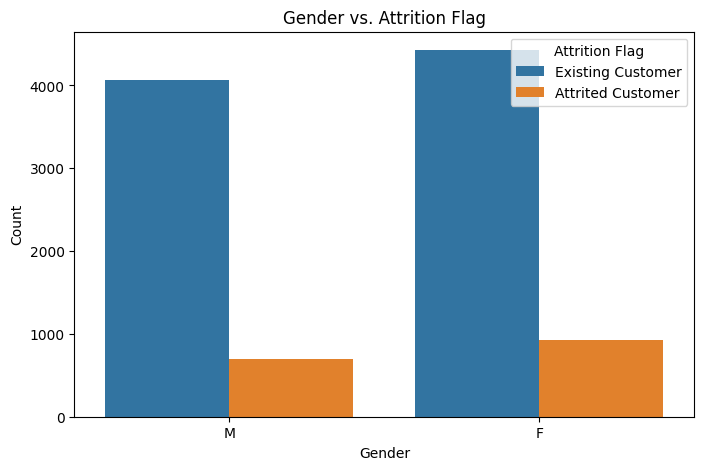

In [17]:
#No diff
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag')
plt.title('Marital Status vs. Attrition Flag')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition_Flag', y='Credit_Limit')
plt.title('Credit Limit by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Credit Limit')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')
plt.title('Gender vs. Attrition Flag')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition_Flag', y='Customer_Age')
plt.title('Customer Age by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Customer Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.title('Education Level vs. Attrition Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')
plt.show()

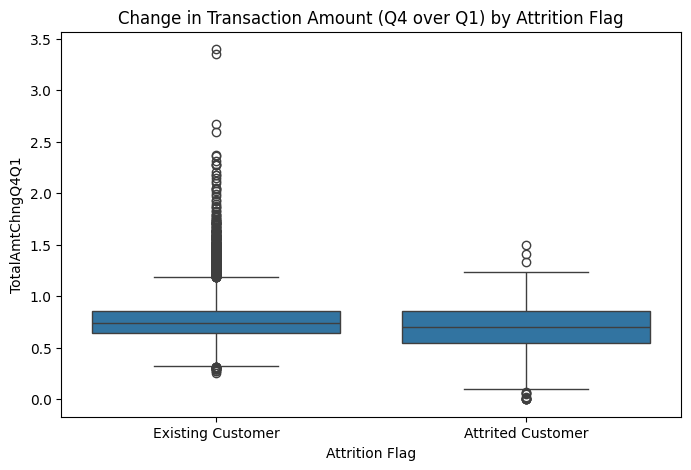

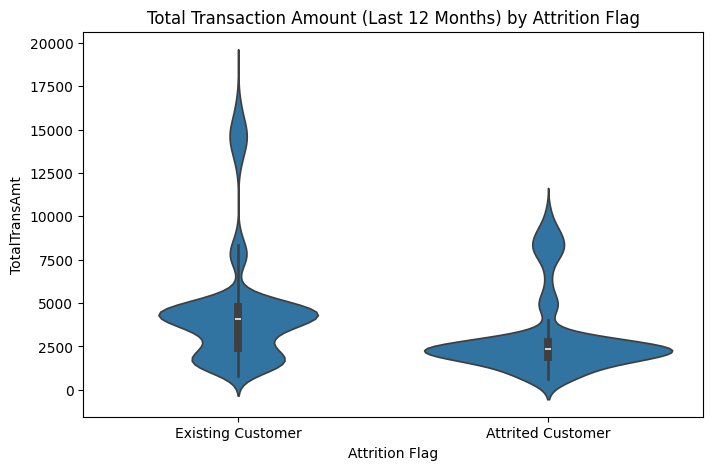

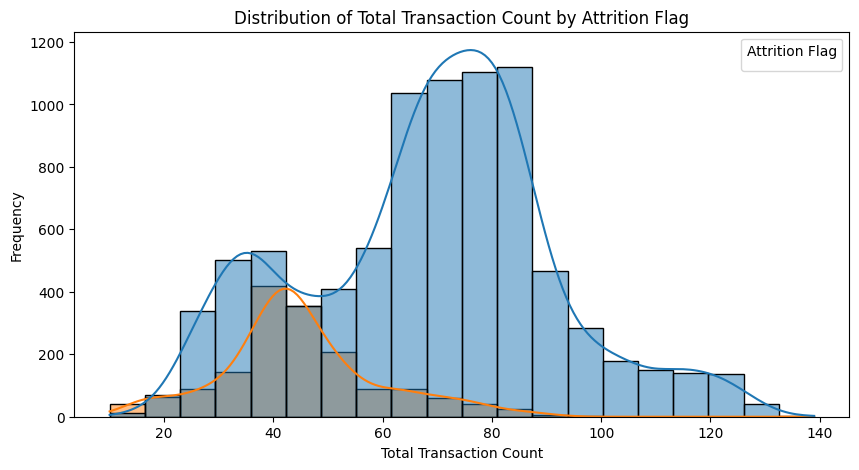

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.title('Change in Transaction Amount (Q4 over Q1) by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('TotalAmtChngQ4Q1')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt')
plt.title('Total Transaction Amount (Last 12 Months) by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('TotalTransAmt')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag', bins=20, kde=True)
plt.title('Distribution of Total Transaction Count by Attrition Flag')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')
plt.legend(title='Attrition Flag')
plt.show()

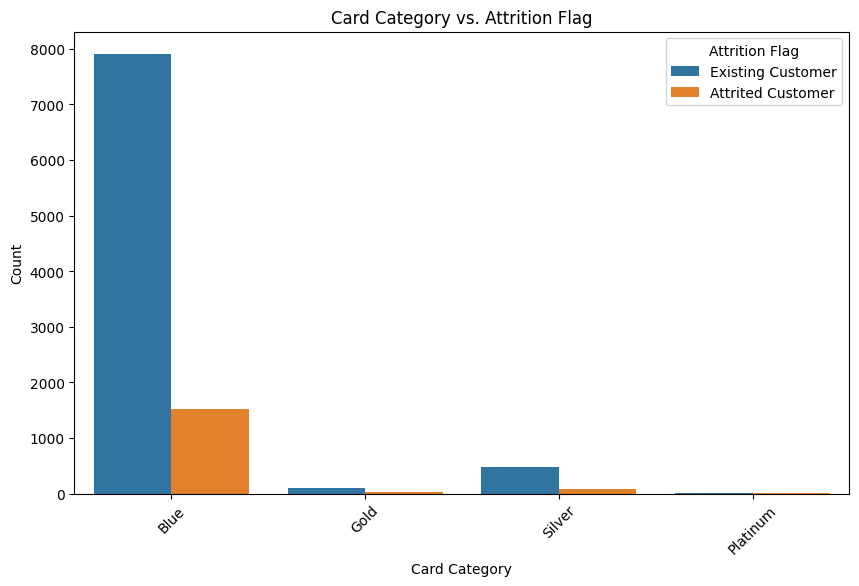

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag')
plt.title('Card Category vs. Attrition Flag')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')
plt.show()